In [78]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import mdp
from datetime import datetime, timedelta
from dateutil.parser import parse
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
# # Define the date on the initial file. Usually 9/23/2020
# startDate = parse('2020-9-23')

# # Define the date on the final file. Usually yesterday's date, which is the most recent complete file (i.e. where complete = not getting updated)
# endDate = datetime.today() - timedelta(days=1)
# # endDate = parse('2020-10-11')

# # Define all coins
# # coins = ["BCH", "BSV", "BTC", "BTG", "DASH", "DOGE", "ETC", "ETH", "LSK", "LTC", "NEO", "OMG", "QTUM", "XLM", "XMR",
# #          "XRP", "ZEC"]
# coins = ["BCH"]

# # Folder where all files are stored
# # folder = "Data"
# folder = "Data"

# # type of files to read
# fileExtension = ".csv"

# # Data types of columns to read from the folder
# dataTypes = ['f', 'f', 'f', 'f', 'f', 'f', 'U6', 'U36', 'i', 'U36']

# # Read and append all data file files
# empty = []
# DataDictionary = {}
# coin = "BCH"
# #     for coin in coins:
# date = startDate

# DataDictionary[coin] = np.asarray(empty)

    

In [3]:
# Define the date on the initial file. Usually 9/23/2020
startDate = parse('2020-9-23')

# Define the date on the final file. Usually yesterday's date, which is the most recent complete file (i.e. where complete = not getting updated)
# endDate = datetime.today() - timedelta(days=1)
endDate = parse('2020-11-12')

# Folder where all files are stored
folder = "Data"

# type of files to read
fileExtension = ".csv"

# Data types of columns to read from the folder
dataTypes = ['f', 'f', 'f', 'f', 'f', 'f', 'U6', 'U36', 'i', 'U36']

# Define all coins
# coins = ["BCH", "BSV", "BTC", "BTG", "DASH", "DOGE", "ETC", "ETH", "LSK", "LTC", "NEO", "OMG", "QTUM", "XLM", "XMR",
#          "XRP", "ZEC"]
coins = ["BCH"]

# Read and append all data file files
empty = []
DataDictionary = {}
for coin in coins:
    date = startDate

    DataDictionary[coin] = np.asarray(empty)

    while(date <= endDate):
        day = date.day
        if(day < 10):
            day = '0' + str(day)
        else:
            day = str(day)

        month = date.month
        if(month < 10):
            month = '0' + str(month)
        else:
            month = str(month)

        year = str(date.year)

        pathname = folder + "/" + coin + "/" + coin + "_" + \
            day + "_" + month + "_" + year + fileExtension

        print(pathname)
        data = np.genfromtxt(pathname, dtype=dataTypes,
                             delimiter=',', names=True, usecols=np.arange(0, 10))

        if(len(DataDictionary[coin]) == 0):
            DataDictionary[coin] = data
        else:
            DataDictionary[coin] = np.append(DataDictionary[coin], data)
        date = date + timedelta(days=1)


Data/BCH/BCH_23_09_2020.csv
Data/BCH/BCH_24_09_2020.csv
Data/BCH/BCH_25_09_2020.csv
Data/BCH/BCH_26_09_2020.csv
Data/BCH/BCH_27_09_2020.csv
Data/BCH/BCH_28_09_2020.csv
Data/BCH/BCH_29_09_2020.csv
Data/BCH/BCH_30_09_2020.csv
Data/BCH/BCH_01_10_2020.csv
Data/BCH/BCH_02_10_2020.csv
Data/BCH/BCH_03_10_2020.csv
Data/BCH/BCH_04_10_2020.csv
Data/BCH/BCH_05_10_2020.csv
Data/BCH/BCH_06_10_2020.csv
Data/BCH/BCH_07_10_2020.csv
Data/BCH/BCH_08_10_2020.csv
Data/BCH/BCH_09_10_2020.csv
Data/BCH/BCH_10_10_2020.csv
Data/BCH/BCH_11_10_2020.csv
Data/BCH/BCH_12_10_2020.csv
Data/BCH/BCH_13_10_2020.csv
Data/BCH/BCH_14_10_2020.csv
Data/BCH/BCH_15_10_2020.csv
Data/BCH/BCH_16_10_2020.csv
Data/BCH/BCH_17_10_2020.csv
Data/BCH/BCH_18_10_2020.csv
Data/BCH/BCH_19_10_2020.csv
Data/BCH/BCH_20_10_2020.csv
Data/BCH/BCH_21_10_2020.csv
Data/BCH/BCH_22_10_2020.csv
Data/BCH/BCH_23_10_2020.csv
Data/BCH/BCH_24_10_2020.csv
Data/BCH/BCH_25_10_2020.csv
Data/BCH/BCH_26_10_2020.csv
Data/BCH/BCH_27_10_2020.csv
Data/BCH/BCH_28_10_2

In [28]:
print(len(DataDictionary))
print(len(DataDictionary[coin]))

1
217364


In [29]:
coin = coins[0]
tempData = DataDictionary[coin]
DataDictionary[coin].dtype.names

('ask_price',
 'bid_price',
 'mark_price',
 'high_price',
 'low_price',
 'open_price',
 'symbol',
 'id',
 'volume',
 'datetime')

In [30]:
tempData['id']

array(['2f2b77c4-e426-4271-ae49-18d5cb296d3a',
       '2f2b77c4-e426-4271-ae49-18d5cb296d3a',
       '2f2b77c4-e426-4271-ae49-18d5cb296d3a', ...,
       '2f2b77c4-e426-4271-ae49-18d5cb296d3a',
       '2f2b77c4-e426-4271-ae49-18d5cb296d3a',
       '2f2b77c4-e426-4271-ae49-18d5cb296d3a'], dtype='<U36')

In [31]:
ask_price = tempData['ask_price']
bid_price = tempData['bid_price']
mark_price = tempData['mark_price']
datetimeStrings = tempData['datetime']
volume = tempData['volume']
spread = ask_price - bid_price
percentageOfPrice = (spread/mark_price) *100

print(ask_price[0:10])
print(bid_price[0:10])
print(spread[0:10])
print(percentageOfPrice)


[209.29    209.48    209.45834 209.48    209.48    209.45    209.48949
 209.52    209.41881 209.28   ]
[208.98238 209.22447 209.13469 209.19    209.19    209.18222 209.18222
 209.21915 209.14    208.99   ]
[0.3076172  0.25552368 0.32365417 0.2899933  0.2899933  0.2677765
 0.30726624 0.30085754 0.2788086  0.2899933 ]
[0.1470894  0.12205444 0.15463907 ... 0.4922132  0.50798136 0.49608034]


In [32]:
datetimes = np.asarray([])
for dateString in datetimeStrings:
    datetimes = np.append(datetimes, datetime.fromisoformat(dateString))

In [33]:
print(datetimes[0])
print(datetimes[1])
print(datetimes[2])
print(type(datetimes))
print(type(datetimes[0]))

2020-09-23 19:42:02.484146-05:00
2020-09-23 19:42:17.444203-05:00
2020-09-23 19:42:32.437536-05:00
<class 'numpy.ndarray'>
<class 'datetime.datetime'>


In [45]:
print(volume[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [48]:
tempData2 = DataDictionary[coin]
print(type(tempData2))
print(tempData2.dtype.names)
print(len(tempData2.dtype.names))

tempData2["spread"] = tempData2['ask_price'] - tempData2['bid_price']


<class 'numpy.ndarray'>
('ask_price', 'bid_price', 'mark_price', 'high_price', 'low_price', 'open_price', 'symbol', 'id', 'volume', 'datetime')
10


ValueError: no field of name spread

In [6]:
type(DataDictionary["BCH"])
coinData = DataDictionary["BCH"]

In [7]:
pd_data = pd.DataFrame(data=coinData, columns=coinData.dtype.names)

In [8]:
pd_data

,ask_price,bid_price,mark_price,high_price,low_price,open_price,symbol,id,volume,datetime
0,209.289993,208.982376,209.136185,218.235001,202.684998,217.330002,BCHUSD,2f2b77c4-e426-4271-ae49-18d5cb296d3a,0,2020-09-23 19:42:02.484146-05:00
1,209.479996,209.224472,209.352234,218.235001,202.684998,217.330002,BCHUSD,2f2b77c4-e426-4271-ae49-18d5cb296d3a,0,2020-09-23 19:42:17.444203-05:00
2,209.458344,209.134689,209.296509,218.235001,202.684998,217.330002,BCHUSD,2f2b77c4-e426-4271-ae49-18d5cb296d3a,0,2020-09-23 19:42:32.437536-05:00
3,209.479996,209.190002,209.335007,218.235001,202.684998,217.330002,BCHUSD,2f2b77c4-e426-4271-ae49-18d5cb296d3a,0,2020-09-23 19:43:02.509043-05:00
4,209.479996,209.190002,209.335007,218.235001,202.684998,217.330002,BCHUSD,2f2b77c4-e426-4271-ae49-18d5cb296d3a,0,2020-09-23 19:43:17.453045-05:00
...,...,...,...,...,...,...,...,...,...,...
221759,259.730164,249.669998,254.700073,265.345001,250.944565,254.595001,BCHUSD,2f2b77c4-e426-4271-ae49-18d5cb296d3a,0,2020-11-12 18:19:02.628744-05:00
221760,259.730164,249.669998,254.700073,265.345001,250.944565,254.595001,BCHUSD,2f2b77c4-e426-4271-ae49-18d5cb296d3a,0,2020-11-12 18:19:17.547436-05:00
221761,259.730164,249.669998,254.700073,265.345001,250.944565,254.595001,BCHUSD,2f2b77c4-e426-4271-ae49-18d5cb296d3a,0,2020-11-12 18:19:32.535786-05:00
221762,259.730164,249.669998,254.700073,265.345001,250.944565,254.595001,BCHUSD,2f2b77c4-e426-4271-ae49-18d5cb296d3a,0,2020-11-12 18:19:47.562657-05:00


In [9]:
pd_data["datetime"] = pd.to_datetime(pd_data["datetime"])

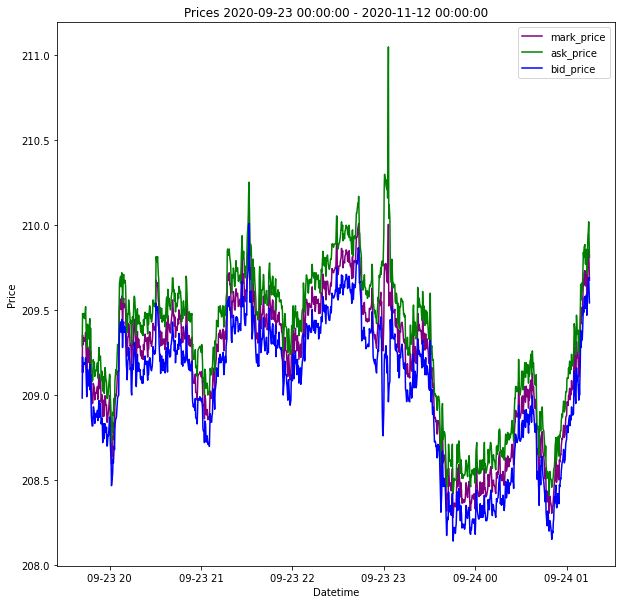

In [11]:
sub_data = pd_data.head(1000)
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(sub_data['datetime'],
        sub_data['mark_price'],
        color='purple',
        label="mark_price")

# Add x-axis and y-axis
ax.plot(sub_data['datetime'],
        sub_data['ask_price'],
        color='green',
        label="ask_price")

# Add x-axis and y-axis
ax.plot(sub_data['datetime'],
        sub_data['bid_price'],
        color='blue',
        label="bid_price")

# Set title and labels for axes
ax.set(xlabel="Datetime",
       ylabel="Price",
       title=("Prices " + str(startDate) + " - " + str(endDate)))
plt.legend()
plt.show()

In [66]:
print(pd_data.dtypes)
print("-------------------------")
# rollingData = pd.DataFrame(pd_data.drop(columns=['symbol', 'id']), index=pd_data["datetime"])
rollingData = pd_data.drop(columns=['symbol', 'id']).set_index("datetime").sort_index()
print(rollingData.dtypes)


ask_price                                    float32
bid_price                                    float32
mark_price                                   float32
high_price                                   float32
low_price                                    float32
open_price                                   float32
symbol                                        object
id                                            object
volume                                         int32
datetime      datetime64[ns, pytz.FixedOffset(-300)]
dtype: object
-------------------------
ask_price     float32
bid_price     float32
mark_price    float32
high_price    float32
low_price     float32
open_price    float32
volume          int32
dtype: object


In [13]:
# print(rollingData)
# print(len(rollingData))

                                   ask_price   bid_price  mark_price  \
datetime                                                               
2020-09-23 19:42:02.484146-05:00  209.289993  208.982376  209.136185   
2020-09-23 19:42:17.444203-05:00  209.479996  209.224472  209.352234   
2020-09-23 19:42:32.437536-05:00  209.458344  209.134689  209.296509   
2020-09-23 19:43:02.509043-05:00  209.479996  209.190002  209.335007   
2020-09-23 19:43:17.453045-05:00  209.479996  209.190002  209.335007   
...                                      ...         ...         ...   
2020-11-12 18:19:02.628744-05:00  259.730164  249.669998  254.700073   
2020-11-12 18:19:17.547436-05:00  259.730164  249.669998  254.700073   
2020-11-12 18:19:32.535786-05:00  259.730164  249.669998  254.700073   
2020-11-12 18:19:47.562657-05:00  259.730164  249.669998  254.700073   
2020-11-12 18:20:03.047383-05:00  259.730164  249.669998  254.700073   

                                  high_price   low_price  open_

In [15]:
# rollingData.rolling('2D').mean()

,ask_price,bid_price,mark_price,high_price,low_price,open_price,volume
datetime,,,,,,,
2020-09-23 19:42:02.484146-05:00,209.289993,208.982376,209.136185,218.235001,202.684998,217.330002,0.0
2020-09-23 19:42:17.444203-05:00,209.384995,209.103424,209.244209,218.235001,202.684998,217.330002,0.0
2020-09-23 19:42:32.437536-05:00,209.409444,209.113846,209.261642,218.235001,202.684998,217.330002,0.0
2020-09-23 19:43:02.509043-05:00,209.427082,209.132885,209.279984,218.235001,202.684998,217.330002,0.0
2020-09-23 19:43:17.453045-05:00,209.437665,209.144308,209.290988,218.235001,202.684998,217.330002,0.0
...,...,...,...,...,...,...,...
2020-11-12 18:19:02.628744-05:00,258.282280,256.621990,257.452134,261.955929,251.995567,256.387040,0.0
2020-11-12 18:19:17.547436-05:00,258.282464,256.621331,257.451897,261.955878,251.995279,256.386240,0.0
2020-11-12 18:19:32.535786-05:00,258.282640,256.620665,257.451652,261.955828,251.994991,256.385441,0.0


In [16]:


# rollingData["1D_mean_mark_price"] = rollingData["mark_price"].rolling(window='1D', min_periods=1000).mean()
# rollingData["8D_mean_mark_price"] = rollingData["mark_price"].rolling(window='8D', min_periods=1000).mean()

# rollingData["1D_mean_of_1D_mean_mark_price"] = rollingData["1D_mean_mark_price"].rolling(window='1D', min_periods=1000).mean()


In [17]:
# rollingData.iloc[20000:21000]

,ask_price,bid_price,mark_price,high_price,low_price,open_price,volume,1D_mean_mark_price,8D_mean_mark_price,1D_mean_of_1D_mean_mark_price
datetime,,,,,,,,,,
2020-09-28 10:50:17.091360-05:00,231.302704,230.949997,231.126358,234.485001,226.485001,228.634995,0,229.113914,218.903052,224.241624
2020-09-28 10:50:32.077291-05:00,231.335800,231.070007,231.202896,234.485001,226.485001,228.634995,0,229.115802,218.903667,224.243531
2020-09-28 10:51:02.108011-05:00,231.279999,230.970001,231.125000,234.485001,226.485001,228.634995,0,229.117670,218.904278,224.245438
2020-09-28 10:51:17.065400-05:00,231.300003,230.979996,231.139999,234.485001,226.485001,228.634995,0,229.119503,218.904890,224.247345
2020-09-28 10:51:32.113660-05:00,231.360001,231.070694,231.215347,234.485001,226.485001,228.634995,0,229.121347,218.905505,224.249253
...,...,...,...,...,...,...,...,...,...,...
2020-09-28 16:22:02.093780-05:00,229.210007,228.876541,229.043274,235.315002,226.485001,228.634995,0,229.975128,219.464739,226.079107
2020-09-28 16:22:17.071930-05:00,229.229477,228.885971,229.057724,235.315002,226.485001,228.634995,0,229.975908,219.465196,226.080923
2020-09-28 16:22:32.060622-05:00,229.228531,228.899994,229.064255,235.315002,226.485001,228.634995,0,229.976693,219.465653,226.082739


In [61]:
import time

In [67]:
# Generate duration values
minInDay = 24*60
minInHour = 60
DurationMin = {}

NumDays = 7
for i in range(1, NumDays+1):
    DurationMin.update( { str(i) + "D" : i*minInDay })
NumHoursInDay = 24
for i in range(1, NumHoursInDay):
    DurationMin.update( {str(i) + "h" : i*minInDay })
print(DurationMin)
print(DurationMin.keys())

{'1D': 1440, '2D': 2880, '3D': 4320, '4D': 5760, '5D': 7200, '6D': 8640, '7D': 10080, '1h': 1440, '2h': 2880, '3h': 4320, '4h': 5760, '5h': 7200, '6h': 8640, '7h': 10080, '8h': 11520, '9h': 12960, '10h': 14400, '11h': 15840, '12h': 17280, '13h': 18720, '14h': 20160, '15h': 21600, '16h': 23040, '17h': 24480, '18h': 25920, '19h': 27360, '20h': 28800, '21h': 30240, '22h': 31680, '23h': 33120}
dict_keys(['1D', '2D', '3D', '4D', '5D', '6D', '7D', '1h', '2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h', '19h', '20h', '21h', '22h', '23h'])


In [71]:
#######################################
# Calculate velocity for all durations
#######################################
start_total = time.time()
for duration in DurationMin.keys():
    print("key: " + duration)
    print("duration: " + str(DurationMin.get(duration)))
    start_loop = time.time()
    rollingData["mark_price_" + duration + "_velocity"] = rollingData["mark_price"].rolling(window=duration, min_periods=100) \
        .apply(lambda x: (x[-1]-x[0])/DurationMin.get(duration))
    end_loop = time.time()
    loopTime = end_loop-start_loop
    print("loop time seconds: " + str(loopTime))
    print("loop time minutes: " + str(loopTime/60))
end_total = time.time()
print("total time minutes: " + str((end_total-start_total)/60))

key: 1D
duration: 1440
loop time seconds: 10.265598773956299
loop time minutes: 0.17109331289927165
key: 2D
duration: 2880
loop time seconds: 10.277216672897339
loop time minutes: 0.171286944548289
key: 3D
duration: 4320
loop time seconds: 10.328721046447754
loop time minutes: 0.17214535077412924
key: 4D
duration: 5760
loop time seconds: 10.353242874145508
loop time minutes: 0.17255404790242512
key: 5D
duration: 7200
loop time seconds: 10.344041347503662
loop time minutes: 0.17240068912506104
key: 6D
duration: 8640
loop time seconds: 10.33280611038208
loop time minutes: 0.17221343517303467
key: 7D
duration: 10080
loop time seconds: 10.317361116409302
loop time minutes: 0.1719560186068217
key: 1h
duration: 1440
loop time seconds: 10.246214151382446
loop time minutes: 0.1707702358563741
key: 2h
duration: 2880
loop time seconds: 10.328184843063354
loop time minutes: 0.1721364140510559
key: 3h
duration: 4320
loop time seconds: 10.224278688430786
loop time minutes: 0.17040464480717976
key: 

In [79]:
#######################################
# Calculate mean and standard deviation for all durations
#######################################
start_total = time.time()
for duration in DurationMin.keys():
    print("key: " + duration)
    start_loop = time.time()
    rollingData["mark_price_" + duration + "_mean"] = rollingData["mark_price"].rolling(window=duration, min_periods=100).mean()
    rollingData["mark_price_" + duration + "_std"] = rollingData["mark_price"].rolling(window=duration, min_periods=100).std()
    end_loop = time.time()
    loopTime = end_loop-start_loop
    print("loop time seconds: " + str(loopTime))
    print("loop time minutes: " + str(loopTime/60))
end_total = time.time()
print("total time minutes: " + str((end_total-start_total)/60))

key: 1D
loop time seconds: 0.03800034523010254
loop time minutes: 0.0006333390871683756
key: 2D
loop time seconds: 0.03500819206237793
loop time minutes: 0.0005834698677062988
key: 3D
loop time seconds: 0.03400826454162598
loop time minutes: 0.0005668044090270996
key: 4D
loop time seconds: 0.03400826454162598
loop time minutes: 0.0005668044090270996
key: 5D
loop time seconds: 0.03400731086730957
loop time minutes: 0.0005667885144551595
key: 6D
loop time seconds: 0.033007144927978516
loop time minutes: 0.0005501190821329753
key: 7D
loop time seconds: 0.03500819206237793
loop time minutes: 0.0005834698677062988
key: 1h
loop time seconds: 0.03500771522521973
loop time minutes: 0.0005834619204203288
key: 2h
loop time seconds: 0.036008358001708984
loop time minutes: 0.000600139300028483
key: 3h
loop time seconds: 0.03500866889953613
loop time minutes: 0.0005834778149922689
key: 4h
loop time seconds: 0.03500843048095703
loop time minutes: 0.0005834738413492839
key: 5h
loop time seconds: 0.03

In [80]:
rollingData.dtypes

ask_price              float32
bid_price              float32
mark_price             float32
high_price             float32
low_price              float32
                        ...   
mark_price_21h_std     float64
mark_price_22h_mean    float64
mark_price_22h_std     float64
mark_price_23h_mean    float64
mark_price_23h_std     float64
Length: 97, dtype: object

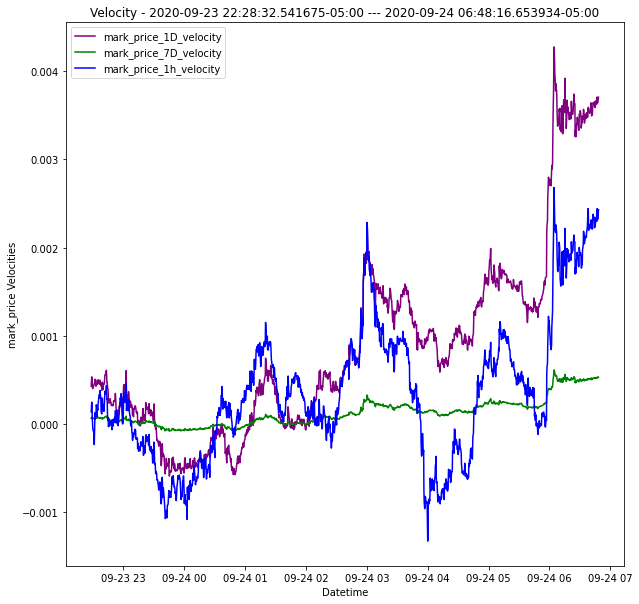

In [77]:
#######################################
# Graph the velcity for a few time periods
#######################################

sub_data = rollingData.iloc[500:2000]
# sub_data = rollingData
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(sub_data.index,
        sub_data['mark_price_1D_velocity'],
        color='purple',
        label="mark_price_1D_velocity")

# Add x-axis and y-axis
ax.plot(sub_data.index,
        sub_data['mark_price_7D_velocity'],
        color='green',
        label="mark_price_7D_velocity")

# Add x-axis and y-axis
ax.plot(sub_data.index,
        sub_data['mark_price_1h_velocity'],
        color='blue',
        label="mark_price_1h_velocity")

# Set title and labels for axes
ax.set(xlabel="Datetime",
       ylabel="mark_price Velocities",
       title=("Velocity - " + str(sub_data.index[0]) + " --- " + str(sub_data.index[-1])))


plt.legend()
plt.show()

In [21]:
# start1 = time.time()
# temp = rollingData["mark_price"].rolling(window='1D', min_periods=1000).agg(lambda x: (x[-1]-x[0])/len(x))
# end1 = time.time()
# print(end1-start1)

10.679419994354248


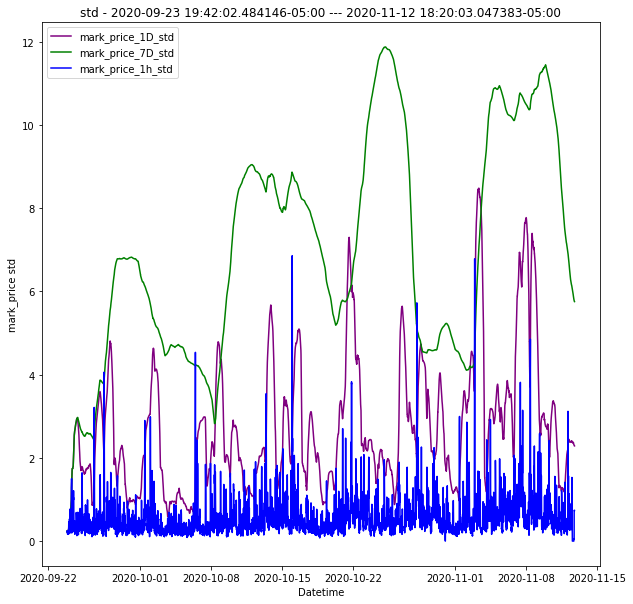

In [82]:
#######################################
# Graph the STD for a few time periods
#######################################

# sub_data = rollingData.iloc[500:2000]
sub_data = rollingData
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(sub_data.index,
        sub_data['mark_price_1D_std'],
        color='purple',
        label="mark_price_1D_std")

# Add x-axis and y-axis
ax.plot(sub_data.index,
        sub_data['mark_price_7D_std'],
        color='green',
        label="mark_price_7D_std")

# Add x-axis and y-axis
ax.plot(sub_data.index,
        sub_data['mark_price_1h_std'],
        color='blue',
        label="mark_price_1h_std")

# Set title and labels for axes
ax.set(xlabel="Datetime",
       ylabel="mark_price std",
       title=("std - " + str(sub_data.index[0]) + " --- " + str(sub_data.index[-1])))


plt.legend()
plt.show()

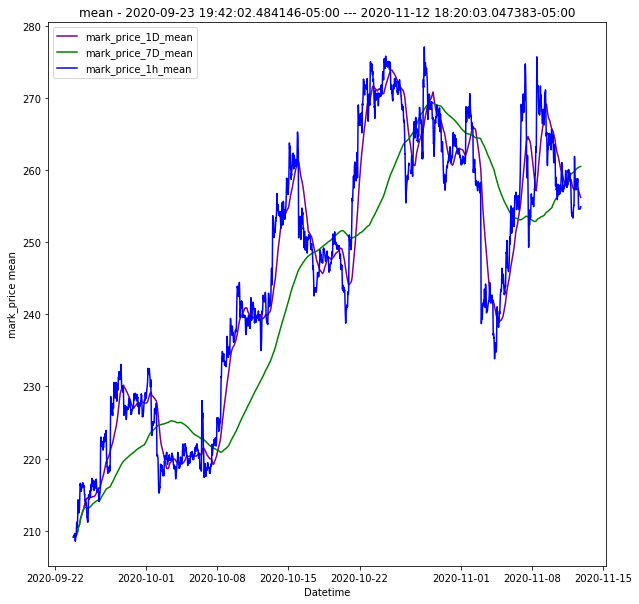

In [83]:
#######################################
# Graph the MEAN for a few time periods
#######################################

# sub_data = rollingData.iloc[500:2000]
sub_data = rollingData
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(sub_data.index,
        sub_data['mark_price_1D_mean'],
        color='purple',
        label="mark_price_1D_mean")

# Add x-axis and y-axis
ax.plot(sub_data.index,
        sub_data['mark_price_7D_mean'],
        color='green',
        label="mark_price_7D_mean")

# Add x-axis and y-axis
ax.plot(sub_data.index,
        sub_data['mark_price_1h_mean'],
        color='blue',
        label="mark_price_1h_mean")

# Set title and labels for axes
ax.set(xlabel="Datetime",
       ylabel="mark_price mean",
       title=("mean - " + str(sub_data.index[0]) + " --- " + str(sub_data.index[-1])))


plt.legend()
plt.show()

In [84]:
rollingData.to_csv("processedData.csv")